In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
crashes_url = "https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.csv?accessType=download"
persons_url = "https://data.cityofnewyork.us/api/views/f55k-p6yu/rows.csv?accessType=download"

df_crashes = pd.read_csv(crashes_url, low_memory=False)
df_persons = pd.read_csv(persons_url, low_memory=False)

In [ ]:
df_crashes.head()
df_crashes.info()
df_crashes.describe(include='all')
df_crashes.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2220334 entries, 0 to 2220333
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST KILLED      int64  
 18  CO

,0
CRASH DATE,0
CRASH TIME,0
BOROUGH,680275
ZIP CODE,680551
LATITUDE,240359
LONGITUDE,240359
LOCATION,240359
ON STREET NAME,483614
CROSS STREET NAME,848429
OFF STREET NAME,1829094


In [ ]:
df_crashes['CRASH DATE'] = pd.to_datetime(df_crashes['CRASH DATE'], errors='coerce')
df_crashes['YEAR'] = df_crashes['CRASH DATE'].dt.year

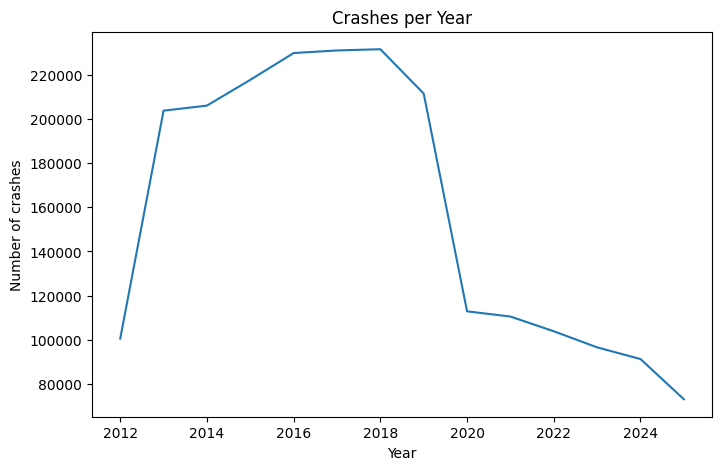

In [ ]:
df_crashes['YEAR'].value_counts().sort_index().plot(kind='line', figsize=(8,5))
plt.title("Crashes per Year")
plt.xlabel("Year")
plt.ylabel("Number of crashes")
plt.show()

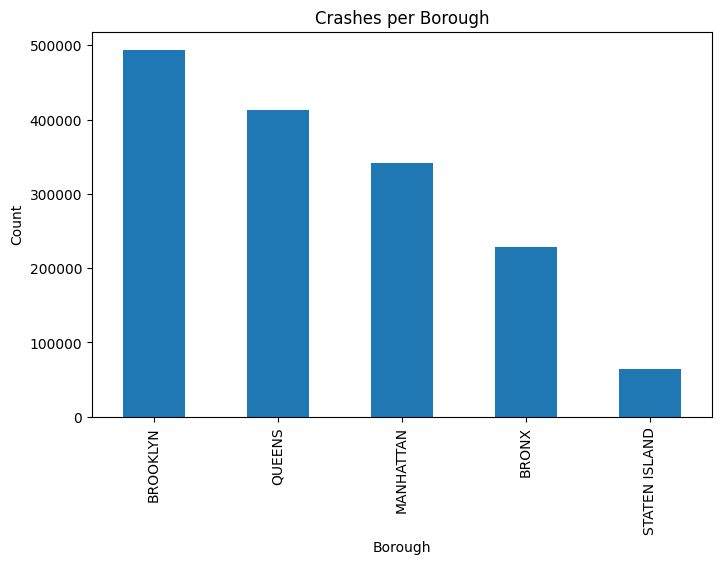

In [ ]:
df_crashes['BOROUGH'].value_counts().plot(kind='bar', figsize=(8,5))
plt.title("Crashes per Borough")
plt.xlabel("Borough")
plt.ylabel("Count")
plt.show()

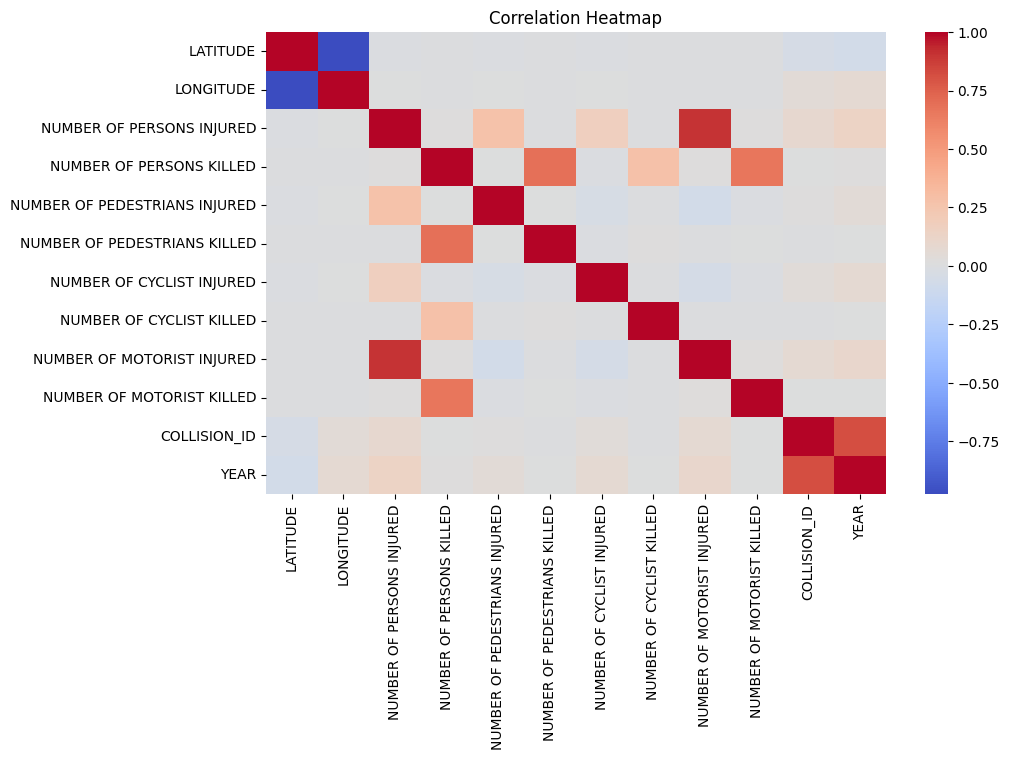

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df_crashes.select_dtypes(include=[np.number]).corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

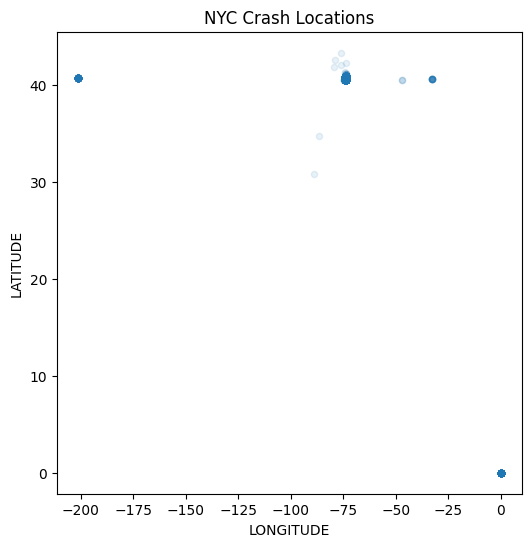

In [ ]:
df_crashes.plot(kind='scatter', x='LONGITUDE', y='LATITUDE', alpha=0.1, figsize=(6,6))
plt.title("NYC Crash Locations")
plt.show()

phase 3

In [ ]:
df_crashes = df_crashes.dropna(subset=['CRASH DATE', 'LATITUDE', 'LONGITUDE']).copy()

In [ ]:
df_crashes['BOROUGH'] = df_crashes['BOROUGH'].astype(str).str.upper().str.strip()
df_crashes['CONTRIBUTING FACTOR VEHICLE 1'] = df_crashes['CONTRIBUTING FACTOR VEHICLE 1'].astype(str).str.upper().str.strip()

/tmp/ipython-input-3014105704.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_crashes['BOROUGH'] = df_crashes['BOROUGH'].astype(str).str.upper().str.strip()
/tmp/ipython-input-3014105704.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_crashes['CONTRIBUTING FACTOR VEHICLE 1'] = df_crashes['CONTRIBUTING FACTOR VEHICLE 1'].astype(str).str.upper().str.strip()


In [ ]:
df_crashes['CRASH TIME'] = pd.to_datetime(df_crashes['CRASH TIME'], format='%H:%M', errors='coerce')

In [ ]:
df_crashes = df_crashes.drop_duplicates(subset='COLLISION_ID')

In [ ]:
cols = ['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED']
for c in cols:
    Q1 = df_crashes[c].quantile(0.25)
    Q3 = df_crashes[c].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_crashes = df_crashes[(df_crashes[c] >= lower) & (df_crashes[c] <= upper)]

In [ ]:
numeric_columns = ['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED']
df_crashes[numeric_columns] = df_crashes[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [ ]:
df_crashes.info()
df_crashes.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 1491743 entries, 9 to 2220333
Data columns (total 30 columns):
 #   Column                         Non-Null Count    Dtype         
---  ------                         --------------    -----         
 0   CRASH DATE                     1491743 non-null  datetime64[ns]
 1   CRASH TIME                     1491743 non-null  datetime64[ns]
 2   BOROUGH                        1491743 non-null  object        
 3   ZIP CODE                       1143501 non-null  object        
 4   LATITUDE                       1491743 non-null  float64       
 5   LONGITUDE                      1491743 non-null  float64       
 6   LOCATION                       1491743 non-null  object        
 7   ON STREET NAME                 1142628 non-null  object        
 8   CROSS STREET NAME              910160 non-null   object        
 9   OFF STREET NAME                299172 non-null   object        
 10  NUMBER OF PERSONS INJURED      1491743 non-null  float64   

,0
CRASH DATE,0
CRASH TIME,0
BOROUGH,0
ZIP CODE,348242
LATITUDE,0
LONGITUDE,0
LOCATION,0
ON STREET NAME,349115
CROSS STREET NAME,581583
OFF STREET NAME,1192571


phase 4

In [ ]:
df_crashes['COLLISION_ID'] = pd.to_numeric(df_crashes['COLLISION_ID'], errors='coerce')
df_persons['COLLISION_ID'] = pd.to_numeric(df_persons['COLLISION_ID'], errors='coerce')

In [ ]:
df_crashes = df_crashes.dropna(subset=['COLLISION_ID'])
df_persons = df_persons.dropna(subset=['COLLISION_ID'])

In [ ]:
df_merged = df_crashes.merge(
    df_persons,
    on='COLLISION_ID',
    how='left'
)

In [ ]:
df_merged.info()
df_merged.head()
df_merged.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4086153 entries, 0 to 4086152
Data columns (total 50 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   CRASH DATE                     datetime64[ns]
 1   CRASH TIME                     datetime64[ns]
 2   BOROUGH                        object        
 3   ZIP CODE                       object        
 4   LATITUDE                       float64       
 5   LONGITUDE                      float64       
 6   LOCATION                       object        
 7   ON STREET NAME                 object        
 8   CROSS STREET NAME              object        
 9   OFF STREET NAME                object        
 10  NUMBER OF PERSONS INJURED      float64       
 11  NUMBER OF PERSONS KILLED       float64       
 12  NUMBER OF PEDESTRIANS INJURED  int64         
 13  NUMBER OF PEDESTRIANS KILLED   int64         
 14  NUMBER OF CYCLIST INJURED      int64         
 15  NUMBER OF CYCLI

,0
CRASH DATE,0
CRASH TIME,0
BOROUGH,0
ZIP CODE,1251956
LATITUDE,0
LONGITUDE,0
LOCATION,0
ON STREET NAME,967999
CROSS STREET NAME,1919453
OFF STREET NAME,3170094


In [ ]:
columns_to_drop = [
    'ZIP_CODE_y', 'LATITUDE_y', 'LONGITUDE_y', 'LOCATION_y'
]

for col in columns_to_drop:
    if col in df_merged.columns:
        df_merged = df_merged.drop(columns=[col])

In [ ]:
df_merged = df_merged.rename(columns={
    'ZIP_CODE_x': 'ZIP_CODE',
    'LATITUDE_x': 'LATITUDE',
    'LONGITUDE_x': 'LONGITUDE'
})

In [ ]:
df_merged['PERSON_AGE'] = pd.to_numeric(df_merged['PERSON_AGE'], errors='coerce')

phase 5

In [ ]:
df_merged.isna().sum().sort_values(ascending=False).head(20)

,0
CONTRIBUTING_FACTOR_2,4078976
CONTRIBUTING_FACTOR_1,4078952
PED_ACTION,4078800
PED_LOCATION,4078794
VEHICLE TYPE CODE 5,4060298
CONTRIBUTING FACTOR VEHICLE 5,4059394
VEHICLE TYPE CODE 4,4002186
CONTRIBUTING FACTOR VEHICLE 4,3998614
VEHICLE TYPE CODE 3,3748371
CONTRIBUTING FACTOR VEHICLE 3,3734509


In [ ]:
# Drop rows missing essential crash information
df_merged = df_merged.dropna(subset=['CRASH DATE', 'LATITUDE', 'LONGITUDE'])

# Fill non-critical missing values
df_merged['PERSON_TYPE'] = df_merged['PERSON_TYPE'].fillna('Unknown')
df_merged['PERSON_INJURY'] = df_merged['PERSON_INJURY'].fillna('Unknown')
df_merged['PERSON_SEX'] = df_merged['PERSON_SEX'].fillna('Unknown')

In [ ]:
cols_to_drop = [col for col in df_merged.columns if col.endswith('_y')]
df_merged = df_merged.drop(columns=cols_to_drop)

In [ ]:
# Fix date and time formats
df_merged['CRASH_DATE'] = pd.to_datetime(df_merged['CRASH_DATE'], errors='coerce')

# Convert numeric columns
num_cols = ['NUMBER_OF_PERSONS_INJURED', 'NUMBER_OF_PERSONS_KILLED', 'AGE']
for col in num_cols:
    if col in df_merged.columns:
        df_merged[col] = pd.to_numeric(df_merged[col], errors='coerce')

In [ ]:
df_merged.info()
df_merged.head()

<class 'pandas.core.frame.DataFrame'>
Index: 3557006 entries, 0 to 4086152
Data columns (total 50 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   CRASH DATE                     datetime64[ns]
 1   CRASH TIME                     datetime64[ns]
 2   BOROUGH                        object        
 3   ZIP CODE                       object        
 4   LATITUDE                       float64       
 5   LONGITUDE                      float64       
 6   LOCATION                       object        
 7   ON STREET NAME                 object        
 8   CROSS STREET NAME              object        
 9   OFF STREET NAME                object        
 10  NUMBER OF PERSONS INJURED      float64       
 11  NUMBER OF PERSONS KILLED       float64       
 12  NUMBER OF PEDESTRIANS INJURED  int64         
 13  NUMBER OF PEDESTRIANS KILLED   int64         
 14  NUMBER OF CYCLIST INJURED      int64         
 15  NUMBER OF CYCLIST KI

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,YEAR,UNIQUE_ID,CRASH_DATE,CRASH_TIME,PERSON_ID,PERSON_TYPE,PERSON_INJURY,VEHICLE_ID,PERSON_AGE,EJECTION,EMOTIONAL_STATUS,BODILY_INJURY,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,PED_LOCATION,PED_ACTION,COMPLAINT,PED_ROLE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,PERSON_SEX
0,2021-09-11,1900-01-01 09:35:00,BROOKLYN,11208,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,0.0,0.0,0,0,0,0,0,0,UNSPECIFIED,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN,2021,11945216.0,2021-09-11,9:35,3cb21800-426f-47c8-a79e-fb65f2d2115e,Occupant,Unspecified,20060293.0,28.0,Not Ejected,Does Not Apply,Does Not Apply,Unknown,NaN,NaN,NaN,Does Not Apply,Driver,NaN,NaN,F
1,2021-09-11,1900-01-01 09:35:00,BROOKLYN,11208,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,0.0,0.0,0,0,0,0,0,0,UNSPECIFIED,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN,2021,11945217.0,2021-09-11,9:35,d7bbe88a-d44d-4155-8076-923b24b371be,Occupant,Unspecified,20060293.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,F
2,2021-12-14,1900-01-01 08:13:00,BROOKLYN,11233,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,0.0,0.0,0,0,0,0,0,0,NAN,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN,2021,12061885.0,2021-12-14,8:13,49b837fa-d00c-40a2-8af1-31ea2ce302f2,Pedestrian,Unspecified,NaN,46.0,NaN,Does Not Apply,Does Not Apply,NaN,NaN,Pedestrian/Bicyclist/Other Pedestrian at Inter...,"Crossing, No Signal, Marked Crosswalk",Does Not Apply,Pedestrian,Unspecified,Unspecified,M
3,2021-12-14,1900-01-01 17:05:00,NAN,NaN,40.709183,-73.956825,"(40.709183, -73.956825)",BROOKLYN QUEENS EXPRESSWAY,NaN,NaN,0.0,0.0,0,0,0,0,0,0,PASSING TOO CLOSELY,Unspecified,NaN,NaN,NaN,4486555,Sedan,Tractor Truck Diesel,NaN,NaN,NaN,2021,12060794.0,2021-12-14,17:05,e817c53d-1f35-48e2-bb60-3b08b981d8a2,Occupant,Unspecified,20126912.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,M
4,2021-12-14,1900-01-01 17:05:00,NAN,NaN,40.709183,-73.956825,"(40.709183, -73.956825)",BROOKLYN QUEENS EXPRESSWAY,NaN,NaN,0.0,0.0,0,0,0,0,0,0,PASSING TOO CLOSELY,Unspecified,NaN,NaN,NaN,4486555,Sedan,Tractor Truck Diesel,NaN,NaN,NaN,2021,12060793.0,2021-12-14,17:05,4bbdba8f-0b80-48ee-80f9-67f3e0de63b9,Occupant,Unspecified,20126912.0,32.0,Not Ejected,Does Not Apply,Does Not Apply,Driver,Lap Belt & Harness,NaN,NaN,Does Not Apply,Driver,NaN,NaN,F
